## Demo code for Principal Components Analysis (PCA)

We'll use this notebook to demonstrate PCA on some toy data and image data.


In [1]:
import os, gzip
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Toy data examples

This is the code used to generate some of the first examples in the lecture slides.


(-2.33039301441873, 2.33039301441873)

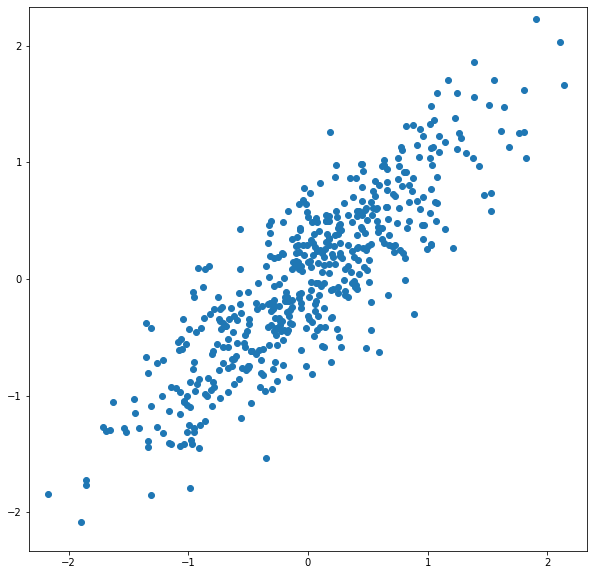

In [2]:
n = 500
X = np.matrix(np.random.normal(size=2*n))
X = X.reshape(n, 2)
scale = .3
X[:,1] = scale * X[:,1]
theta = np.pi/4
R = np.matrix([np.cos(theta), np.sin(theta), -np.sin(theta), np.cos(theta)]).reshape(2,2)
X = X * R
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])
plt.figure(figsize=(10,10))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]))
lim = np.max(np.abs(X))+.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

In [ ]:
pca = PCA().fit(X)
principal_vectors = pca.components_
principal_vectors[0]

In [ ]:
pc1 = principal_vectors[0]
slope = pc1[1]/pc1[0]
plt.figure()
plt.figure(figsize=(10,10))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]))
plt.plot([lim, -lim], [lim*slope, -lim*slope], 'k', color = 'r', linewidth=4)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

In [ ]:
# let's check that the principal vectors are orthogonal
np.dot(principal_vectors[0], principal_vectors[1])

## MNIST and Fashion MNIST

Next we'll run PCA on the MNIST and Fashion MNIST data.

To run the code, put the data in directories named `mnist` and `fashion-mnist` within the same directory as this notebook. 

You can download the data here:

MNIST   http://yann.lecun.com/exdb/mnist/<br>
FASHION-MNIST    https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

Download the following files:<br>
train-images-idx3-ubyte.gz<br>
train-labels-idx1-ubyte.gz<br>
t10k-images-idx3-ubyte.gz<br>
t10k-labels-idx1-ubyte.gz


In [ ]:
# Define function that is used to read mnist and fashion mnist data

def load_data(dataset_name):
    data_dir = os.path.join("./", dataset_name)
        
    def extract_data(filename, num_data, head_size, data_size):
        with gzip.open(filename) as bytestream:
            bytestream.read(head_size)
            buf = bytestream.read(data_size * num_data)
            data = np.frombuffer(buf, dtype=np.uint8).astype(np.float)
        return data

    data = extract_data(data_dir + '/train-images-idx3-ubyte.gz', 60000, 16, 28 * 28)
    trX = data.reshape((60000, 28, 28))

    data = extract_data(data_dir + '/train-labels-idx1-ubyte.gz', 60000, 8, 1)
    trY = data.reshape((60000))

    data = extract_data(data_dir + '/t10k-images-idx3-ubyte.gz', 10000, 16, 28 * 28)
    teX = data.reshape((10000, 28, 28))

    data = extract_data(data_dir + '/t10k-labels-idx1-ubyte.gz', 10000, 8, 1)
    teY = data.reshape((10000))

    trY = np.asarray(trY)
    teY = np.asarray(teY)

    X = np.concatenate((trX, teX), axis=0)
    y = np.concatenate((trY, teY), axis=0).astype(np.int)

    seed = 409
    np.random.seed(seed)
    np.random.shuffle(X)
    np.random.seed(seed)
    np.random.shuffle(y)
    return X / 255., y    

In [ ]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# MNIST

In [ ]:
# load data
x, y = load_data('mnist')
height, width = (28, 28)
X = x.reshape([70000, height*width])

In [ ]:
images = X[(y==3), :]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [ ]:
cimages = np.subtract(images, avgimg)
_ = plt.imshow(cimages[0].reshape((28, 28)), cmap=plt.cm.gray.reversed())
_ = plt.imshow(np.add(cimages[0], avgimg).reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [ ]:
num_components = 25
pca = PCA(num_components).fit(cimages)
principal_vectors = pca.components_
principal_vectors = principal_vectors.reshape((num_components, height, width))
pcs = pca.fit_transform(cimages)
capprox = pca.inverse_transform(pcs)
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5)
ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

In [ ]:
approx = np.add(capprox, avgimg)

In [ ]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples)


# Fashion-MNIST

In [ ]:
# load data
x, y = load_data('fashion-mnist')
height, width = (28, 28)
X = x.reshape([70000, height*width])

In [ ]:
images = X[(y==3), :]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [ ]:
cimages = np.subtract(images, avgimg)
_ = plt.imshow(cimages[1].reshape((28, 28)), cmap=plt.cm.gray.reversed())
_ = plt.imshow(np.add(cimages[1], avgimg).reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [ ]:
num_components = 100
pca = PCA(num_components).fit(cimages)
principal_vectors = pca.components_.reshape((num_components, height, width))
pcs = pca.fit_transform(cimages)
capprox = pca.inverse_transform(pcs)
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5)
ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

In [ ]:
approx = np.add(capprox, avgimg)

In [ ]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples)


**labels**:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

## Face Data

Finally, we'll use the ["Labeled Faces in the Wild"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) dataset.


In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
height, width = (50, 37)
lfw_people.target_names

In [ ]:
label = 3
images = X[(y==label),:]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((height, width)), cmap=plt.cm.gray)

In [ ]:
cimages = np.subtract(images, avgimg)
_ = plt.imshow(cimages[2].reshape((height, width)), cmap=plt.cm.gray)
_ = plt.imshow(np.add(cimages[2], avgimg).reshape((height, width)), cmap=plt.cm.gray)

In [ ]:
num_components = 50
pca = PCA(num_components).fit(cimages)
principal_vectors = pca.components_.reshape((num_components, height, width))
pcs = pca.fit_transform(cimages)
capprox = pca.inverse_transform(pcs)
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5, reversed=True)
ratio = pca.explained_variance_ratio_.sum()
print('%s' % lfw_people.target_names[label])
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

In [ ]:
approx = np.add(capprox, avgimg)

In [ ]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples, reversed=True)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples, reversed=True)